In [1]:
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np
import os
from MCForecastTools import MCSimulation


# Monte Carlo Simulations

# Best index funds of 2022

### The list below includes index funds from a variety of companies tracking a variety of broadly diversified indexes and it includes some of the lowest-cost funds you can buy and sell on the public markets. When it comes to index funds like these, one of the most important factors in your total return is cost. Included are three mutual funds and seven ETFs:

* Invesco QQQ Trust ETF (QQQ)
* Vanguard Growth ETF (VUG)
* Fidelity ZERO Large Cap Index (FNILX)
* Shelton NASDAQ-100 Index Direct (NASDX)
* Schwab S&P 500 Index Fund (SWPPX)

**1. Invesco QQQ Trust ETF (QQQ)**

The Invesco QQQ Trust ETF is another index fund that tracks the performance of the largest non-financial companies in the Nasdaq-100 Index. This ETF started trading in 1999, and it’s managed by Invesco, a fund giant. This fund is the top-performing large-cap fund in terms of total return over the 15 years to Sept. 2021, according to Lipper.

Expense ratio: 0.20 percent. That means every 10k invested would cost 20 dollars annually.

---

**2. Vanguard Growth ETF (VUG)**

Vanguard Growth ETF offers a low expense ratio of just .04%, the Vanguard Growth ETF is a fund that’s specifically targeted toward companies that tend to do a bit better than the market average, and companies that weather market shocks better than their competition most of the time.

Expense ratio: 0.04 percent. That means every 10k invested would cost 4 dollars annually.

---

**3. Fidelity ZERO Large Cap Index (FNILX)**

The Fidelity ZERO Large Cap Index mutual fund is part of the investment company’s foray into mutual funds with no expense ratio, thus its ZERO moniker. The fund doesn’t officially track the S&P 500 – technically it follows the Fidelity U.S. Large Cap Index – but the difference is academic. The real difference is that investor-friendly Fidelity doesn’t have to cough up a licensing fee to use the S&P name, keeping costs lower for investors.

Expense ratio: 0 percent. That means every 10k invested would cost 0 anually. (free)

---

**4. Shelton NASDAQ-100 Index Direct (NASDX)**

The Shelton Nasdaq-100 Index Direct ETF tracks the performance of the largest non-financial companies in the Nasdaq-100 Index, which includes primarily tech companies. This mutual fund began trading in 2000 and has a strong record over the last five and ten years.

Expense ratio: 0.5 percent. That means every 10k invested would cost 50 dollars annually.

---

**5. Schwab S&P 500 Index Fund (SWPPX)**

With tens of billions in assets, the Schwab S&P 500 Index Fund is on the smaller side of the heavyweights on this list, but that’s not really a concern for investors. This mutual fund has a strong record dating back to 1997, and it’s sponsored by Charles Schwab, one of the most respected names in the industry. Schwab is especially noted for its focus on making investor-friendly products, as evidenced by this fund’s razor-thin expense ratio.

Expense ratio: 0.02 percent. That means every 10k invested would cost 2 dollars annually.

In [2]:
mutual_funds = ['FNILX', 'SWPPX', 'NASDX', 'VUG', 'QQQ']

In [3]:
yahoo_financials_mutualfunds = YahooFinancials(mutual_funds)

In [4]:
daily_mutualfund_prices = yahoo_financials_mutualfunds.get_historical_price_data('2018-05-02', '2022-09-06', 'daily')
# daily_mutualfund_prices

## Fidelity ZERO Large Cap Index (FNILX)

In [5]:
fnilx = daily_mutualfund_prices["FNILX"]["prices"]

# Create a Dataframe using the imported data
fnilx_df = pd.DataFrame(fnilx)

# Set the date as the index to the DataFrame
fnilx_df.set_index(pd.to_datetime(fnilx_df['formatted_date'], infer_datetime_format=True), inplace=True)

# Count nulls
fnilx_df.isnull().sum()

# Drop nulls
fnilx_df = fnilx_df.dropna()

# fnilx_df.head()

### Schwab S&P 500 Index Fund (SWPPX)

In [6]:
swppx = daily_mutualfund_prices["SWPPX"]["prices"]

# Create a Dataframe using the imported data
swppx_df = pd.DataFrame(swppx)
# swppx_df

# Set the date as the index to the DataFrame
swppx_df.set_index(pd.to_datetime(swppx_df['formatted_date'], infer_datetime_format=True), inplace=True)

# Count nulls
swppx_df.isnull().sum()

# Drop nulls
swppx_df = swppx_df.dropna()

# swppx_df.head()

## Shelton NASDAQ-100 Index Direct (NASDX)

In [7]:
nasdx = daily_mutualfund_prices["NASDX"]["prices"]

# Create a Dataframe using the imported data
nasdx_df = pd.DataFrame(nasdx)
# nasdx_df

# Set the date as the index to the DataFrame
nasdx_df.set_index(pd.to_datetime(nasdx_df['formatted_date'], infer_datetime_format=True), inplace=True)

# Count nulls
nasdx_df.isnull().sum()

# Drop nulls
nasdx_df = nasdx_df.dropna()

# nasdx_df.head()

### Vanguard Growth ETF (VUG)

In [8]:
vug = daily_mutualfund_prices["VUG"]["prices"]

# Create a Dataframe using the imported data
vug_df = pd.DataFrame(vug)

# Set the date as the index to the DataFrame
vug_df.set_index(pd.to_datetime(vug_df['formatted_date'], infer_datetime_format=True), inplace=True)

# Count nulls
vug_df.isnull().sum()

# Drop nulls
vug_df = vug_df.dropna()

# vug_df.head()

### Invesco QQQ Trust ETF (QQQ)

In [9]:
qqq = daily_mutualfund_prices["QQQ"]["prices"]

# Create a Dataframe using the imported data
qqq_df = pd.DataFrame(qqq)

# Set the date as the index to the DataFrame
qqq_df.set_index(pd.to_datetime(qqq_df['formatted_date'], infer_datetime_format=True), inplace=True)

# Count nulls
qqq_df.isnull().sum()

# Drop nulls
qqq_df = qqq_df.dropna()

# qqq_df.head()

# Top 5 Performers Based on Portfolio Analysis study

In [10]:
top_5_fund_daily_close = pd.concat([ qqq_df, vug_df, fnilx_df, nasdx_df, swppx_df], axis=1, keys=["QQQ","VUG","FNILX","NASDX","SWPPX"])
top_5_fund_daily_close

QQQ                                                  \
                      date        high         low        open       close   
formatted_date                                                               
2018-05-02      1525267800  163.570007  161.630005  163.059998  161.820007   
2018-05-03      1525354200  162.399994  159.220001  161.000000  161.800003   
2018-05-04      1525440600  165.250000  160.979996  161.100006  164.869995   
2018-05-07      1525699800  166.779999  165.509995  165.639999  166.240005   
2018-05-08      1525786200  166.429993  164.860001  165.889999  166.070007   
...                    ...         ...         ...         ...         ...   
2022-08-29      1661779800  307.220001  303.279999  304.619995  304.410004   
2022-08-30      1661866200  306.730011  298.440002  306.100006  301.019989   
2022-08-31      1661952600  304.910004  299.160004  303.989990  299.269989   
2022-09-01      1662039000  299.779999  292.950012  296.720001  299.399994   
2022-09-02      1662125400  303.750000  293.519989  302.339996  295.170013   

                                                            VUG              \
                  volume    adjclose formatted_date        date        high   
formatted_date                                                                
2018-05-02      38646800  157.251328     2018-05-02  1525267800  144.039993   
2018-05-03      60337100  157.231888     2018-05-03  1525354200  142.990005   
2018-05-04      41543200  160.215240     2018-05-04  1525440600  145.160004   
2018-05-07      32500200  161.546585     2018-05-07  1525699800  146.130005   
2018-05-08      26040200  161.381378     2018-05-08  1525786200  145.800003   
...                  ...         ...            ...         ...         ...   
2022-08-29      48321900  304.410004     2022-08-29  1661779800  245.740005   
2022-08-30      51184500  301.019989     2022-08-30  1661866200  245.520004   
2022-08-31      50044000  299.269989     2022-08-31  1661952600  244.080002   
2022-09-01      57990700  299.399994     2022-09-01  1662039000  239.669998   
2022-09-02      64569600  295.170013     2022-09-02  1662125400  242.729996   

                ...      NASDX                      SWPPX             \
                ...   adjclose formatted_date        date       high   
formatted_date  ...                                                    
2018-05-02      ...  14.424962     2018-05-02  1525267800  40.840000   
2018-05-03      ...  14.424962     2018-05-03  1525354200  40.750000   
2018-05-04      ...  14.696141     2018-05-04  1525440600  41.279999   
2018-05-07      ...  14.809860     2018-05-07  1525699800  41.419998   
2018-05-08      ...  14.792360     2018-05-08  1525786200  41.410000   
...             ...        ...            ...         ...        ...   
2022-08-29      ...  27.750000     2022-08-29  1661779800  62.310001   
2022-08-30      ...  27.430000     2022-08-30  1661866200  61.630001   
2022-08-31      ...  27.280001     2022-08-31  1661952600  61.160000   
2022-09-01      ...  27.290001     2022-09-01  1662039000  61.349998   
2022-09-02      ...  26.900000     2022-09-02  1662125400  60.700001   

                                                                   \
                      low       open      close volume   adjclose   
formatted_date                                                      
2018-05-02      40.840000  40.840000  40.840000      0  37.807148   
2018-05-03      40.750000  40.750000  40.750000      0  37.723831   
2018-05-04      41.279999  41.279999  41.279999      0  38.214470   
2018-05-07      41.419998  41.419998  41.419998      0  38.344070   
2018-05-08      41.410000  41.410000  41.410000      0  38.334820   
...                   ...        ...        ...    ...        ...   
2022-08-29      62.310001  62.310001  62.310001      0  62.310001   
2022-08-30      61.630001  61.630001  61.630001      0  61.630001   
2022-08-31      61.160000  61.160000  61.160000      0 

# Top 5 Performers Weghted Equally

In [11]:
# Configure a Monte Carlo simulation to forecast cumulative returns
MC_dist = MCSimulation(
    portfolio_data = top_5_fund_daily_close,
    weights = [.20, .20, .20, .20, .20],
    num_simulation = 1000,
    num_trading_days = 252*10 # 10 Years
)
 
    
# Print the simulation input data
MC_dist.portfolio_data.head()

QQQ                                                  \
                      date        high         low        open       close   
formatted_date                                                               
2018-05-02      1525267800  163.570007  161.630005  163.059998  161.820007   
2018-05-03      1525354200  162.399994  159.220001  161.000000  161.800003   
2018-05-04      1525440600  165.250000  160.979996  161.100006  164.869995   
2018-05-07      1525699800  166.779999  165.509995  165.639999  166.240005   
2018-05-08      1525786200  166.429993  164.860001  165.889999  166.070007   

                                                                         VUG  \
                  volume    adjclose formatted_date daily_return        date   
formatted_date                                                                 
2018-05-02      38646800  157.251328     2018-05-02          NaN  1525267800   
2018-05-03      60337100  157.231888     2018-05-03    -0.000124  1525354200   
2018-05-04      41543200  160.215240     2018-05-04     0.018974  1525440600   
2018-05-07      32500200  161.546585     2018-05-07     0.008310  1525699800   
2018-05-08      26040200  161.381378     2018-05-08    -0.001023  1525786200   

                ...        NASDX       SWPPX                                   \
                ... daily_return        date       high        low       open   
formatted_date  ...                                                             
2018-05-02      ...          NaN  1525267800  40.840000  40.840000  40.840000   
2018-05-03      ...     0.000000  1525354200  40.750000  40.750000  40.750000   
2018-05-04      ...     0.018799  1525440600  41.279999  41.279999  41.279999   
2018-05-07      ...     0.007738  1525699800  41.419998  41.419998  41.419998   
2018-05-08      ...    -0.001181  1525786200  41.410000  41.410000  41.410000   

                                                                         
                    close volume   adjclose formatted_date daily_return  
formatted_date                                                           
2018-05-02      40.840000      0  37.807148     2018-05-02          NaN  
2018-05-03      40.750000      0  37.723831     2018-05-03    -0.002204  
2018-05-04      41.279999      0  38.214470     2018-05-04     0.013006  
2018-05-07      41.419998      0  38.344070     2018-05-07     0.003391  
2018-05-08      41.410000      0  38.334820     2018-05-08    -0.000241  

[5 rows x 45 columns]

In [12]:
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992849,1.002891,0.978079,0.995116,0.992139,0.990467,0.998646,1.012371,1.005701,0.998577,...,1.000271,0.999007,1.007871,1.003238,1.001460,0.995083,1.004395,1.007206,1.007124,1.011414
2,0.999392,1.001840,0.981580,0.998823,1.002952,0.985351,0.997240,1.014613,1.003369,1.004446,...,0.991955,1.002902,1.010202,0.993599,0.996480,1.007741,0.985562,1.011601,1.008278,1.007772
3,0.991484,1.005063,0.973878,1.009687,1.013275,0.981490,0.998005,1.012308,1.003172,0.997137,...,0.994791,1.012813,1.001817,0.982885,0.992497,1.002745,0.989647,1.011133,1.015396,1.011932
4,1.002758,1.019016,0.978735,1.011727,1.012593,0.975145,1.007767,1.015241,0.992029,0.982388,...,0.993492,1.024011,1.000977,0.982079,1.003485,0.999330,0.983530,1.031017,1.014513,1.015680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.261313,3.268736,2.692770,3.365197,4.588851,3.291948,5.323804,2.404532,3.955938,3.711727,...,5.379851,10.218834,2.552158,2.798909,3.927981,3.415904,4.195901,2.369347,3.482549,3.302727
2517,3.297943,3.283496,2.702085,3.365049,4.663776,3.280694,5.278612,2.406066,3.978126,3.703988,...,5.390591,10.165926,2.584727,2.827804,3.980838,3.418065,4.185058,2.360545,3.471170,3.306007
2518,3.271766,3.303573,2.696751,3.337476,4.649821,3.279867,5.280775,2.406578,3.964315,3.704954,...,5.400519,10.116536,2.578387,2.818362,3.966271,3.440249,4.169349,2.384076,3.488700,3.270789
2519,3.258697,3.297532,2.709376,3.345317,4.660125,3.289198,5.365019,2.413274,3.929574,3.707023,...,5.388631,10.061457,2.587235,2.798642,3.956438,3.471007,4.192344,2.430229,3.499334,3.286644


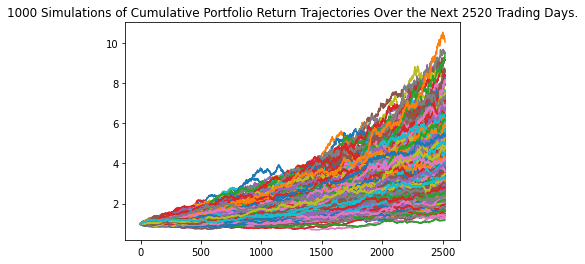

In [13]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

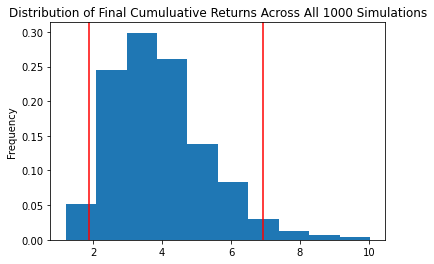

In [14]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               3.947090
std                1.369083
min                1.198762
25%                2.921126
50%                3.743384
75%                4.709500
max               10.034660
95% CI Lower       1.864282
95% CI Upper       6.921109
Name: 2520, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
ci_lower = round(tbl[8]*100000,2)
ci_upper = round(tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the portfolio"
      f" over the next inputted amount of years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $100,000 in the portfolio over the next inputted amount of years will end within in the range of $186428.16 and $692110.87.
